In [1]:
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# nltk
import nltk
import re
import numpy as np
import os
import pandas as pd
import string
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Tools
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
print(train.head(5))
print(train.shape)
print(train.info())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
(31962, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [4]:
print(test.head())
print(test.shape)
print(test.info())

      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...
(17197, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


In [5]:
df = train.append(test, ignore_index = True)
df.head(5)

id  label                                              tweet
0   1    0.0   @user when a father is dysfunctional and is s...
1   2    0.0  @user @user thanks for #lyft credit i can't us...
2   3    0.0                                bihday your majesty
3   4    0.0  #model   i love u take with u all the time in ...
4   5    0.0             factsguide: society now    #motivation

In [6]:
df['label'].isnull().sum()

17197

In [7]:
df.tail(5)

id  label                                              tweet
49154  49155    NaN  thought factory: left-right polarisation! #tru...
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...
49157  49158    NaN  happy, at work conference: right mindset leads...
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...

In [8]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', df.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', df.label.value_counts() / len(df))

Number of positive and negative reviews:  0.0    29720
1.0     2242
Name: label, dtype: int64
Proportion of positive and negative reviews:  0.0    0.604569
1.0    0.045607
Name: label, dtype: float64


EDA

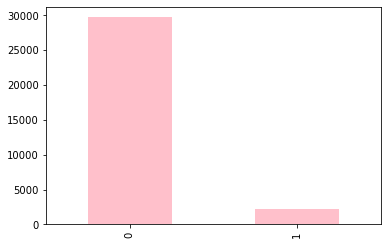

In [9]:
# Visualize the Samples
# print(train[train['label']==0].shape)
# print(train[train['label']==1].shape)

# Plotting Graph
train.label.value_counts().plot.bar(color = 'pink', figsize = (6, 4))

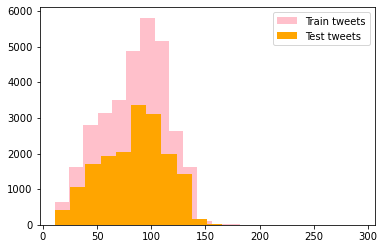

In [10]:
length_train_dataset = train['tweet'].str.len()
length_test_dataset = test['tweet'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets",color="pink")
plt.hist(length_test_dataset, bins=20,label="Test tweets",color="orange")
plt.legend() 
plt.show()

## Preprocessing the Data

### REMOVE @'s

In [11]:
# Function to remove "@user" from all the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [12]:
# remove the twitter handles (@user)
df['neat_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

df

id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                              neat_tweet  
0        when a father is dysfunctional and is so sel...  
1        thanks for #lyft credit i can't use cause th...  
2                                    bihday your majesty  
3      #model   i love u take with u all the time in ...  
4                 factsguide: society now    #motivation  
...                                                  ...  
49154  thought factory: left-right polarisation! #tru...  
49155  feeling like a mermaid ð #hairflip #neverre...  
49156  #hillary #campaigned today in #ohio((omg)) &am...  
49157  happy, at work conference: right mindset leads...  
49158  my   song "so glad" free download!  #shoegaze ...  

[49159 rows x 4 columns]

### REMOVE Punctuation, Numbers & Special Characters

In [13]:
df['neat_tweet'] = df['neat_tweet'].str.replace("[^a-zA-Z#]", " ")

df

id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                              neat_tweet  
0        when a father is dysfunctional and is so sel...  
1        thanks for #lyft credit i can t use cause th...  
2                                    bihday your majesty  
3      #model   i love u take with u all the time in ...  
4                 factsguide  society now    #motivation  
...                                                  ...  
49154  thought factory  left right polarisation  #tru...  
49155  feeling like a mermaid      #hairflip #neverre...  
49156  #hillary #campaigned today in #ohio  omg    am...  
49157  happy  at work conference  right mindset leads...  
49158  my   song  so glad  free download   #shoegaze ...  

[49159 rows x 4 columns]

In [14]:
df['label'].isna().sum()

17197

### REMOVING Short Words

In [15]:
df['neat_tweet'] = df['neat_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

df.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          neat_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation

### TOKENIZATION

In [16]:
# Tokenization is splittng a string of text into tokens
tokenized_tweet = df['neat_tweet'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: neat_tweet, dtype: object

### STEMMING

In [17]:
# Stemming is rule-based process of stripping the suffixes("ing", "ly", "es", "s", etc.) from a word
from nltk.stem.porter import *

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: neat_tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)): 
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['neat_tweet'] = tokenized_tweet

## Data Visualization and Story Generation

### Understanding common words used

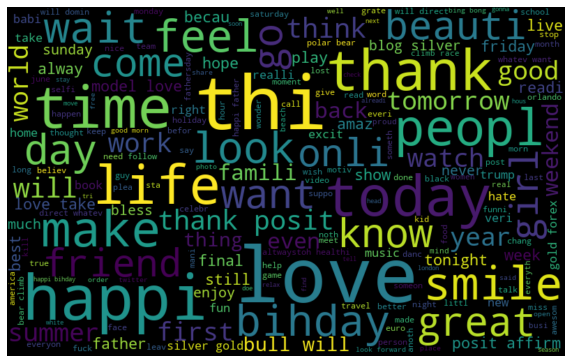

In [19]:
all_words = ' '.join([text for text in df['neat_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Non-Racist/Non-Sexist tweets

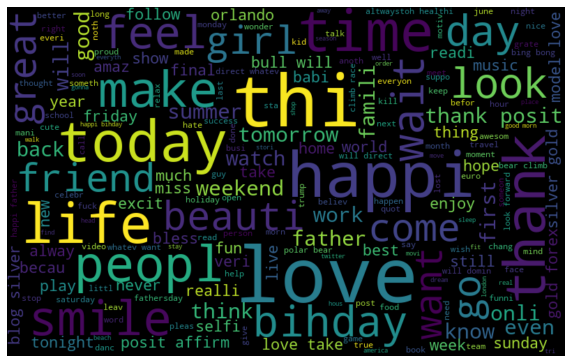

In [20]:
normal_words = ' '.join([text for text in df['neat_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Racist/Sexist Tweets

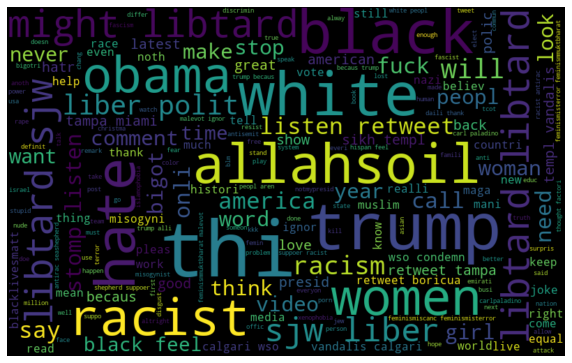

In [21]:
negative_words = ' '.join([text for text in df['neat_tweet'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Understanding impact of Hashtags

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df['neat_tweet'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['neat_tweet'][df['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

#### Non-Racist/Sexist Tweets

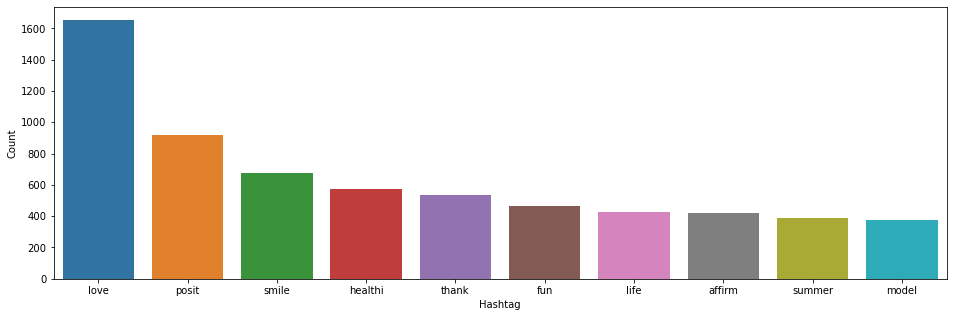

In [24]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Racist/Sexist Tweets

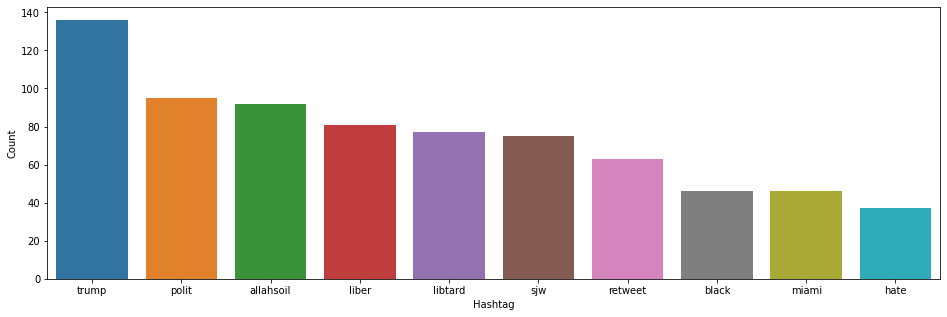

In [25]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Extracting Features from Cleaned Tweets

In [26]:
# To analyze a preprocessed data, it needs to be converted into features. 
# Text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. 
# we will be using  Bag-of-Words and TF-IDF.

### A) Building model using Bag-of-Words features

In [27]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['neat_tweet'])

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['neat_tweet'])

## Model Building: Sentiment Analysis

In [29]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)


lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5295587010824313

In [30]:
# We trained the logistic regression model on the Bag-of-Words features and it gave us an F1-score of 0.53 for the validation set. 
# Now we will use this model to predict for the test data.

In [31]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('./sub_lreg_bow.csv', index=False) # writing data to a CSV file

### B) Building model using TF-IDF features

In [32]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5478723404255319

In [33]:
#The validation score is 0.544 and the public leaderboard F1 score is 0.564. 
# So, by using the TF-IDF features, the validation score has improved and the public leaderboard score is more or less the same.

### TDIDF+NAIVE_BAYES

In [34]:
from sklearn.naive_bayes import MultinomialNB
T_classifier = MultinomialNB()
T_classifier.fit(xtrain_tfidf, ytrain)
prediction = T_classifier.predict(xvalid_tfidf)
prediction_int = prediction[:] >= 0.3
prediction_int = prediction_int.astype(np.int)
score = (f1_score(yvalid,prediction_int))*100
print("TFIDF Näive_Bayes score: " + str(score) + "%")



TFIDF Näive_Bayes score: 41.484716157205234%


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, train['label'],
                                                    test_size=0.2, random_state=69,stratify=train['label'])

In [36]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)
prediction_int = predicted_naive[:] >= 0.3
prediction_int = prediction_int.astype(np.int)
score = (f1_score(y_test,prediction_int))*100
print("TFIDF Näive_Bayes score: " + str(score) + "%")

TFIDF Näive_Bayes score: 42.97520661157026%


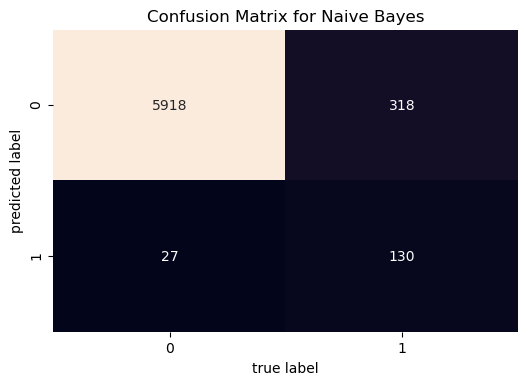

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)


Accuracy with Naive-bayes:  0.9460347254809949
